**Chatbot Documentation**

This document provides an overview and documentation for the chatbot code.

**Introduction**

The chatbot code allows users to have interactive conversations with a chatbot powered by the DialoGPT model. The code utilizes the Hugging Face Transformers library for natural language processing tasks.

**Installation**

To run the chatbot code, make sure you have the following dependencies installed:

1. transformers
2. torch

You can install the required packages using pip:

pip install transformers torch

In [1]:
pip install transformers torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.4 MB/s eta 0:00:00


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

def load_tokenizer_and_model(model="microsoft/DialoGPT-large"):
    """
    Load tokenizer and model instance for a specific DialoGPT model.
    Args:
        model (str): The name or path of the DialoGPT model to load.
    Returns:
        tokenizer: The loaded tokenizer instance.
        model: The loaded model instance.
    """
    # Initialize tokenizer and model
    print("Loading model...")
    tokenizer = AutoTokenizer.from_pretrained(model)
    model = AutoModelForCausalLM.from_pretrained(model)

    # Return tokenizer and model
    return tokenizer, model


def generate_response(tokenizer, model, chat_round, chat_history_ids):
    """
    Generate a response to user input.
    Args:
        tokenizer: The tokenizer instance.
        model: The model instance.
        chat_round (int): The current round of the chat.
        chat_history_ids (torch.Tensor): The chat history tensor.
    Returns:
        torch.Tensor: The updated chat history tensor.
    """
    # Encode user input and End-of-String (EOS) token
    user_input = input(">> You:")  # Get user input
    new_input_ids = tokenizer.encode(user_input + tokenizer.eos_token, return_tensors='pt')  # Encode input

    # Append tokens to chat history
    bot_input_ids = torch.cat([chat_history_ids, new_input_ids], dim=-1) if chat_round > 0 else new_input_ids

    # Generate response with a maximum chat length of 1250 tokens
    chat_history_ids = model.generate(bot_input_ids, max_length=1250, pad_token_id=tokenizer.eos_token_id)

    # Decode and print the response
    chat_history = chat_history_ids[:, bot_input_ids.shape[-1]:][0]
    response = tokenizer.decode(chat_history, skip_special_tokens=True)
    print("Chatbot:", response)

    # Return the updated chat history ids
    return chat_history_ids


def chat_for_n_rounds(n=5):
    """
    Chat with the chatbot for n rounds (default n = 5).
    Args:
        n (int): The number of chat rounds.
    """
    # Load tokenizer and model
    tokenizer, model = load_tokenizer_and_model()

    # Initialize chat history
    chat_history_ids = None

    # Chat for n rounds
    for chat_round in range(n):
        chat_history_ids = generate_response(tokenizer, model, chat_round, chat_history_ids)


if __name__ == '__main__':
    chat_for_n_rounds(5)


Loading model...


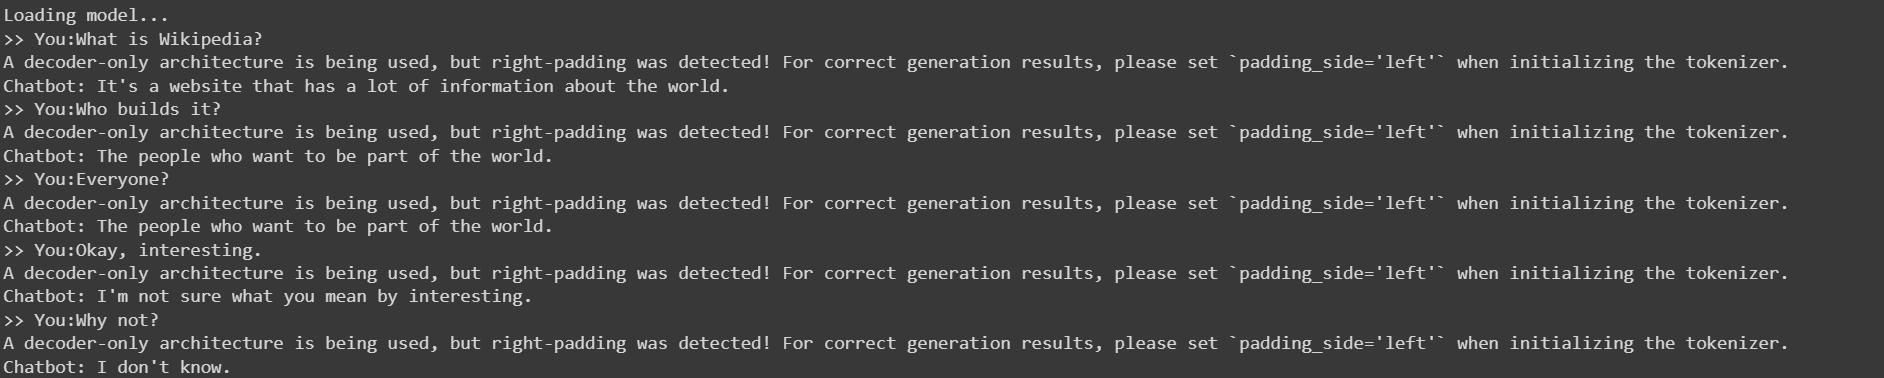